# Credit card fraud detection


<h2>Introduction to Dataset</h2>

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days,

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


Please cite: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

In [118]:
import numpy as np
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



# Loading the dataset

In [119]:
df_credit = pd.read_csv("./creditcard.csv")
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [120]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##  Checking Data Distribution:

1. Distribution of Class Labels (Fraud vs Non-fraud)

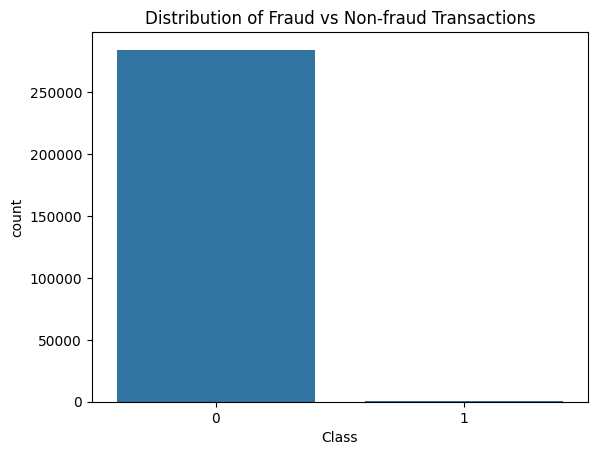

Class
0    284315
1       492
Name: count, dtype: int64


In [121]:
# Class distribution
sns.countplot(x='Class', data=df_credit)
plt.title('Distribution of Fraud vs Non-fraud Transactions')
plt.show()

# Print the count for each class
class_counts = df_credit['Class'].value_counts()
print(class_counts)


2. Distribution of the Transaction Amount

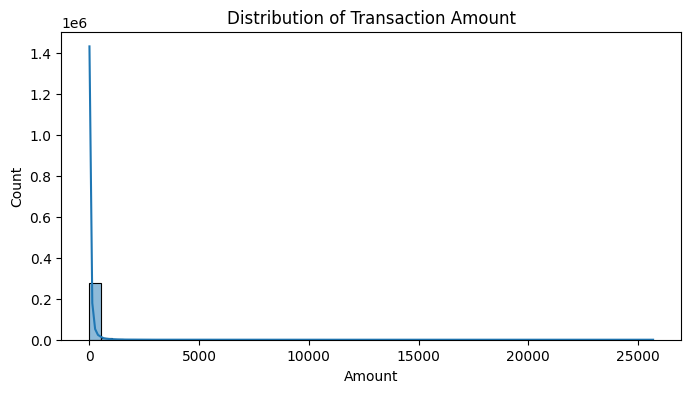

In [122]:
# Distribution of the transaction amount
plt.figure(figsize=(8,4))
sns.histplot(df_credit['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()


3. Distribution of Time Feature

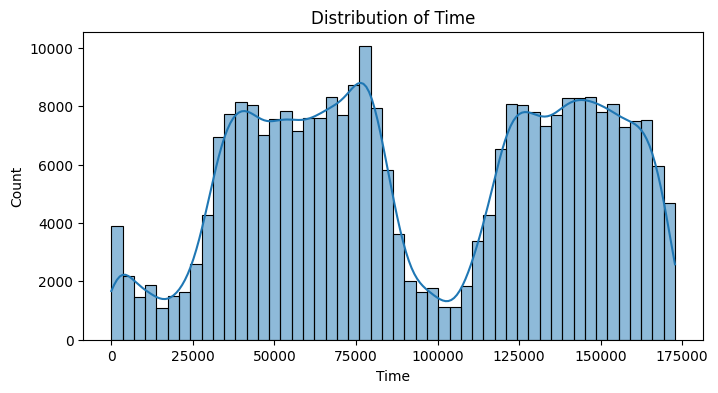

In [123]:
# Distribution of time
plt.figure(figsize=(8,4))
sns.histplot(df_credit['Time'], bins=50, kde=True)
plt.title('Distribution of Time')
plt.show()


4. Distribution of PCA Components (V1 to V28)

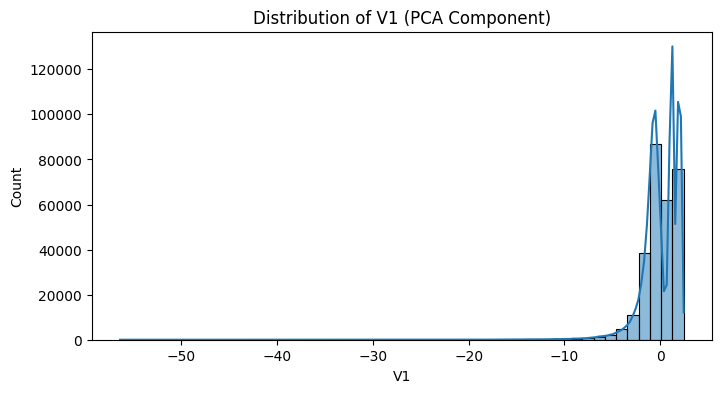

In [124]:
# Visualize the distribution of one or more PCA features
plt.figure(figsize=(8,4))
sns.histplot(df_credit['V1'], bins=50, kde=True)
plt.title('Distribution of V1 (PCA Component)')
plt.show()


## Feature Engineering: Add additional features
As our Time feature are in seconds we will transform it ot minutes and hours to get a better understand of the patterns

In [125]:
# Convert 'Time' from seconds to timedelta
timedelta = pd.to_timedelta(df_credit['Time'], unit='s')

# Extract minutes and hours from the timedelta object
df_credit['Time_min'] = (timedelta.dt.seconds // 60) % 60  # Get minutes
df_credit['Time_hour'] = timedelta.dt.seconds // 3600       # Get hours

# Display the first few rows with the new features
df_credit[['Time', 'Time_min', 'Time_hour']].head()


,Time,Time_min,Time_hour
0,0.0,0,0
1,0.0,0,0
2,1.0,0,0
3,1.0,0,0
4,2.0,0,0


we will select subset of the features to work with

In [126]:
# Select a subset of features to work with
df_credit = df_credit[["Time_hour", "Time_min", "V2", "V3", "V4", "V9", "V10", "V11", "V12", "V14", "V16", "V17", "V18", "V19", "V27", "Amount", "Class"]]

# Display the first few rows of the subset
df_credit.head()


,Time_hour,Time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.133558,149.62,0
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.008983,2.69,0
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.055353,378.66,0
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.062723,123.50,0
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.219422,69.99,0


## Analysis

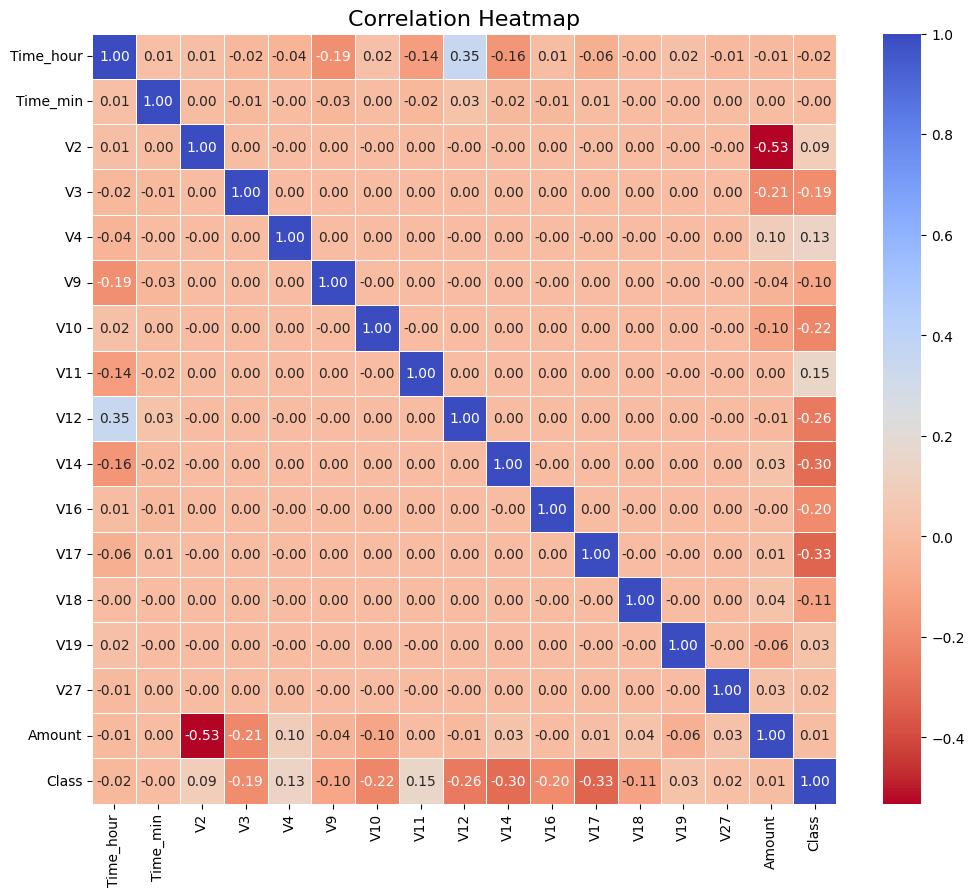

In [127]:
plt.figure(figsize=(12,10))
corr = df_credit.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


Notice this is not very informative, that data seems like it is not very correlated, we will check the correlation agine after resampling

## Get featrues and Target

In [128]:
# Splitting features (X) and target variable (y)
X = df_credit.iloc[:, :-1]  # All columns except the last one
y = df_credit.iloc[:, -1]   # Only the last column (Class)

# Display the shapes of X and y to confirm
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (284807, 16)
Shape of y (target): (284807,)


# Splitting the data

In [129]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=2, stratify=y
)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Checking the distribution of classes in training and test sets
print("\nClass distribution in y_train:\n", y_train.value_counts(normalize=True))
print("\nClass distribution in y_test:\n", y_test.value_counts(normalize=True))


X_train shape: (227845, 16)
X_test shape: (56962, 16)
y_train shape: (227845,)
y_test shape: (56962,)

Class distribution in y_train:
 Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

Class distribution in y_test:
 Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


## Implement testing function

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

def print_evaluations_metrics(y_test, y_pred):
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the recall
    recall = recall_score(y_test, y_pred)

    # Calculate the precision
    precision = precision_score(y_test, y_pred)

    # Calculate the f1 score
    f1 = f1_score(y_test, y_pred)

    print("Accuracy is ", accuracy)
    print('Recall is', recall)
    print('Precision is', precision)
    print('F1 score is', f1)

def print_classification_report(y_test, y_pred):
    # Classification report
    report = classification_report(y_test, y_pred)
    print(report)

def plot_confusion_matrix(y_test, y_pred):
    # Confusion matrix
    confusion = confusion_matrix(y_test, y_pred)

    df_cm = pd.DataFrame(confusion, index=['0', '1'], columns=['0', '1'])
    plt.figure(figsize=(5.5, 4))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_auc_and_roc_curve(y_test, y_pred):
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    
    # AUC
    roc_auc = auc(fpr, tpr)
    print('Area under ROC is', roc_auc)

    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr, tpr, lw=3, label='ROC curve (area = {:0.2f})'.format(roc_auc))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.show()

def evaluate(y_test, y_pred, print_class_report=True, plot_conf_matrix=True, plot_auc_and_roc=True):
    print_evaluations_metrics(y_test, y_pred)
    if print_class_report:
        print_classification_report(y_test, y_pred)
    if plot_conf_matrix:
        plot_confusion_matrix(y_test, y_pred)
    if plot_auc_and_roc:
        plot_auc_and_roc_curve(y_test, y_pred)


## Baseline



Accuracy is  0.855
Recall is 0.8037383177570093
Precision is 0.9148936170212766
F1 score is 0.8557213930348259
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



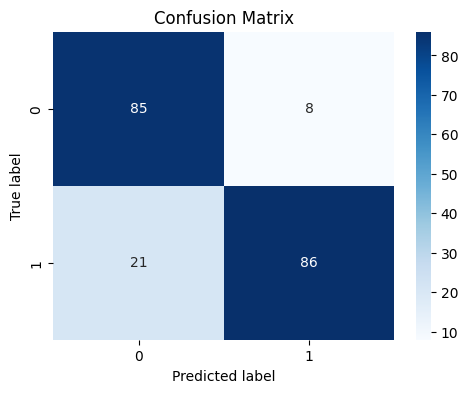

Area under ROC is 0.8588584061903326


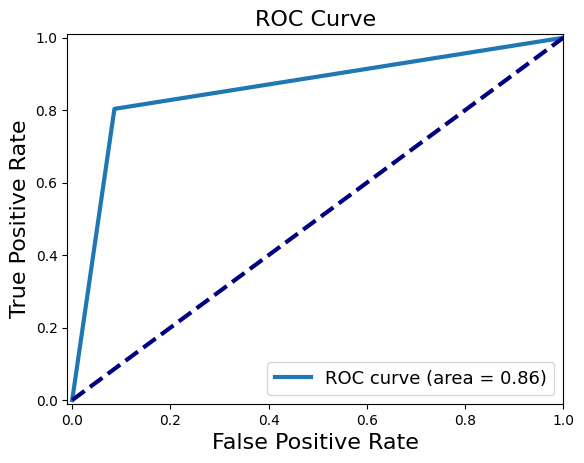

In [131]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a sample dataset (replace this with your actual data)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
evaluate(y_test, y_pred, print_class_report=True, plot_conf_matrix=True, plot_auc_and_roc=True)


## Resampling
first try one sampling strategy (`SMOT` + `RandomForestClassifier`)




Accuracy is  0.94
Recall is 0.65
Precision is 0.7222222222222222
F1 score is 0.6842105263157895
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       180
           1       0.72      0.65      0.68        20

    accuracy                           0.94       200
   macro avg       0.84      0.81      0.83       200
weighted avg       0.94      0.94      0.94       200



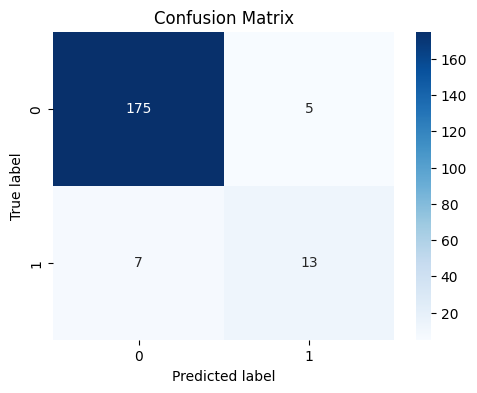

Area under ROC is 0.811111111111111


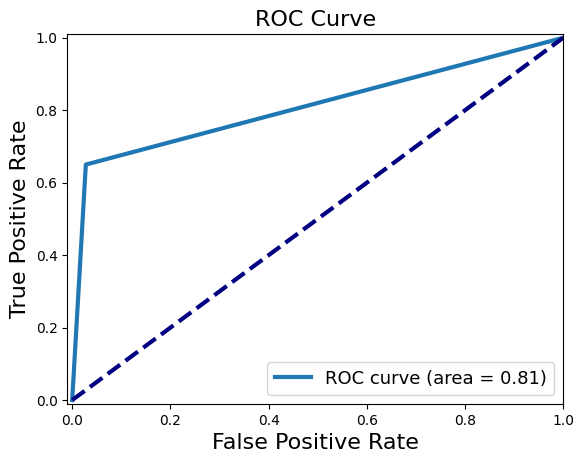

In [132]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a sample dataset (replace this with your actual data)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize and fit the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
evaluate(y_test, y_pred, print_class_report=True, plot_conf_matrix=True, plot_auc_and_roc=True)


use the function `feature_importances` in `RandomForestClassifier` to detramine the most important features.

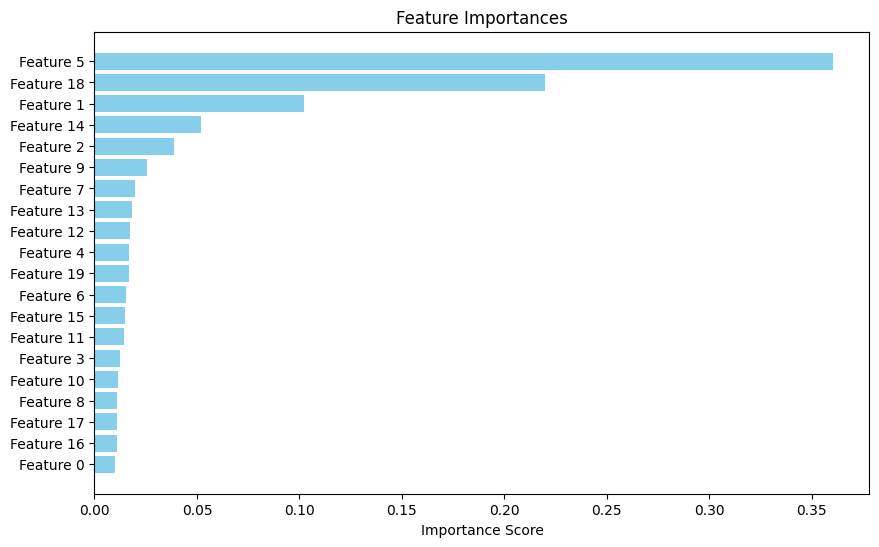

       Feature  Importance
5    Feature 5    0.360071
18  Feature 18    0.219927
1    Feature 1    0.102403
14  Feature 14    0.051976
2    Feature 2    0.038638
9    Feature 9    0.025768
7    Feature 7    0.019842
13  Feature 13    0.018154
12  Feature 12    0.017344
4    Feature 4    0.016806


In [133]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

# Print the most important features
print(feature_importances_df.head(10))

## Model Selection

pefrom `GridSearchCV`with `RandomForestClassifier` 

```
#params of the model
param_grid = {"max_depth": [3,5, None],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}
```

grid search without resampling

In [134]:
from sklearn.model_selection import train_test_split, GridSearchCV


# Define the parameter grid
param_grid = {
    "max_depth": [3, 5, None],
    "n_estimators": [3, 5, 10],
    "max_features": [5, 6, 7, 8]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters from Grid Search:", best_params)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Best parameters from Grid Search: {'max_depth': 5, 'max_features': 7, 'n_estimators': 5}

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       180
           1       0.79      0.55      0.65        20

    accuracy                           0.94       200
   macro avg       0.87      0.77      0.81       200
weighted avg       0.94      0.94      0.94       200



Final Pipeline with Resampling

In [135]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest Classifier with the best parameters
final_model = RandomForestClassifier(**best_params, random_state=42)

# Fit the model on the resampled data
final_model.fit(X_resampled, y_resampled)

# Evaluate the final model on the test set
y_final_test_pred = final_model.predict(X_test)
print("\nClassification Report on Test Set (Final Model):")
print(classification_report(y_test, y_final_test_pred))



Classification Report on Test Set (Final Model):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       180
           1       0.54      0.70      0.61        20

    accuracy                           0.91       200
   macro avg       0.75      0.82      0.78       200
weighted avg       0.92      0.91      0.92       200



reprint Correlation Matrix after applying SMOT 

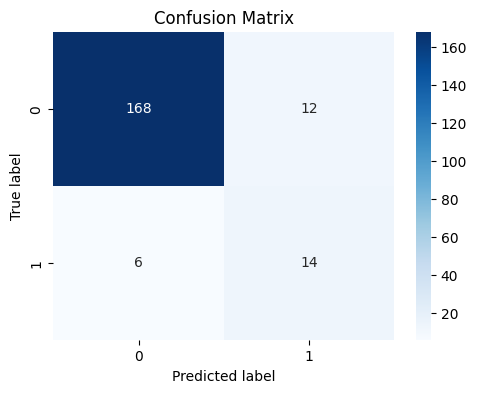

In [136]:
plot_confusion_matrix(y_test, y_final_test_pred)